# 케라스 보스턴 주택 가격 모델

### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)

57344/57026 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [ ]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [ ]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [ ]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean ) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [ ]:
model = Sequential([Dense(100, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


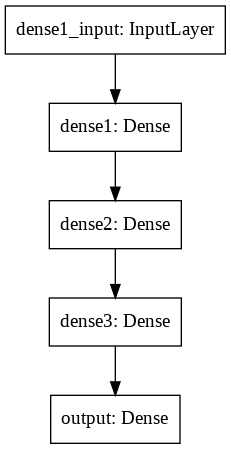

In [ ]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [ ]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

### 모델 학습

In [ ]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5338 - mae: 0.5370 - val_loss: 9.1093 - val_mae: 2.3092
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4370 - mae: 0.4832 - val_loss: 9.3840 - val_mae: 2.3229
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4251 - mae: 0.4756 - val_loss: 10.1029 - val_mae: 2.3858
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4713 - mae: 0.4836 - val_loss: 9.3559 - val_mae: 2.3089
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3760 - mae: 0.4189 - val_loss: 9.5342 - val_mae: 2.3692
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3695 - mae: 0.4195 - val_loss: 9.7654 - val_mae: 2.3693
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5387 - mae: 0.5348 - val_loss: 9.7883 - val_mae: 2.4504
Epoch 8/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6423 - mae: 0.6106 - va

### 모델 평가 
- `evaluate()`

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.2793 - mae: 2.6886


[15.279277801513672, 2.688580274581909]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


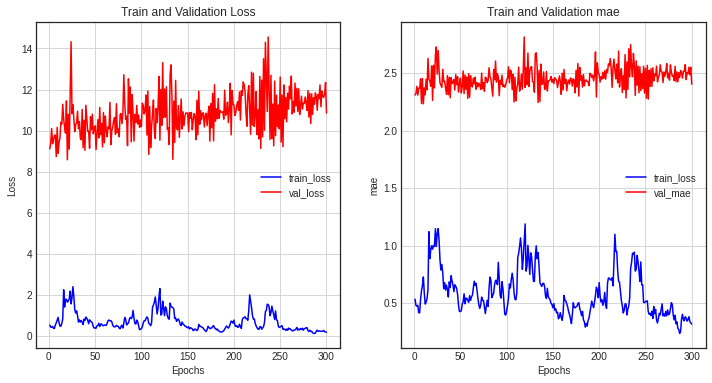

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color='blue', label='train_loss')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation mae')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

In [ ]:
k = 3

kfold = KFold(n_splits=k, random_state=111)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
def build_model():
  input = Input(shape=(13, ), name='input')
  hidden1 = Dense(100, activation='relu', name='dense1')(input)
  hidden2 = Dense(64, activation='relu', name='dense2')(hidden1)
  hidden3 = Dense(32, activation='relu', name='dense3')(hidden2)
  output = Dense(1, name='output')(hidden3)

  model = Model(inputs=[input], outputs=output)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])
  
  return model

In [ ]:
mae_list = []

In [ ]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

  model = build_model()

  model.fit(x_train_fold, y_train_fold, epochs=300,
            validation_data = (x_val_fold, y_val_fold))
  
  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 0s 20ms/step - loss: 585.9746 - mae: 22.3307 - val_loss: 609.2652 - val_mae: 22.6820
Epoch 2/300
6/6 [==============================] - 0s 4ms/step - loss: 549.8513 - mae: 21.4834 - val_loss: 567.7916 - val_mae: 21.7283
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 506.1487 - mae: 20.3973 - val_loss: 515.8178 - val_mae: 20.4623
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 450.3150 - mae: 18.9831 - val_loss: 450.7870 - val_mae: 18.7430
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 382.4174 - mae: 17.0894 - val_loss: 371.3798 - val_mae: 16.4110
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 303.0991 - mae: 14.5291 - val_loss: 283.3824 - val_mae: 13.3527
Epoch 7/300
6/6 [==============================] - 0s 4ms/step - loss: 224.5568 - mae: 11.9773 - val_loss: 204.8409 - val_mae: 10.4187
Epoch 8/300
6/6 [==============================] - 0s 

In [ ]:
print(mae_list)

[9.137593269348145, 8.690263748168945, 8.663058280944824]


In [ ]:
print(np.mean(mae_list))

8.830305099487305
